# Business Problem Understanding

CCP (Churn Customer Prediction):
following my experience and career in Telco Industry (MTN-Irancell), prediction on churn and how to increase the revenue of the company with different campaigns and make the customer more loyal is one of the most challenging problems which the baseline of all actions is to know the churn ratio on our products and our customers.

For this practice, a Dataset that has been chosen is from Kaggle which initially from the IBM (Telco customer churn (11.1.3+), 2022) is related to a telco industry with 7k records and 20 features "WA_Fn-UseC_-Telco-Customer-Churn.CSV" 

As our target is to distinguish the churn customers which are identified with "Yes"/"No" in a specific field "Churn". we have a classification task in Machine Learning. for this purpose we tried different ML classification algorithms such as Decision Tree, SVM, Gaussian Naive Bayes, KNN, and  Logistic Regression, each algorithm has its pros and cons; with different measurement criteria we will choose one of them and explain our hypothesis.


Download link for Dataset:

https://drive.google.com/drive/folders/1tVeHMCC-L7UBGAf5vRRHrLr8qhdkKtRs


# Variable Description

01.	customerID: Unique Values
02.	gender: Whether the customer is a male or a female
03.	SeniorCitizen: Indicates if the customer is 65 or older (1, 0)/: Yes, No
04.	Partner: Whether the customer has a partner or not (Yes, No)
05.	Dependents: Whether the customer has dependents or not (Yes, No)
06.	Tenure: Number of months the customer has stayed with the company
07.	PhoneService: Whether the customer has a phone service or not (Yes, No)
08.	MultipleLines: Whether the customer has multiple lines or not (Yes, No, No phone service)
09.	InternetService: Customer’s internet service provider (DSL, Fiber optic, No)
10.	OnlineSecurity: Whether the customer has online security or not (Yes, No, No internet service)
11.	OnlineBackup: Whether the customer has online backup or not (Yes, No, No internet service)
12.	DeviceProtection: Whether the customer has device protection or not (Yes, No, No internet service)
13.	TechSupport: Whether the customer has tech support or not (Yes, No, No internet service)
14.	StreamingTV: Whether the customer has streaming TV or not (Yes, No, No internet service)
15.	StreamingMovies: Whether the customer has streaming movies or not (Yes, No, No internet service)
16.	Contract: The contract term of the customer (Month-to-month, One year, Two year)
17.	PaperlessBilling: Whether the customer has paperless billing or not (Yes, No)
18.	PaymentMethod: The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
19.	MonthlyCharges: The amount charged to the customer monthly
20.	TotalCharges: The total amount charged to the customer
21.	Churn: Customers who left within the last month, the column is called Churn (Yes or No)


# 1 Importing Libraries

Importing libraries such as:
1. pandas for data analysis.
2. numpy for working with arrays.
3. plotly and seaborn for representing graphs and plots
4. sklearn and sub-libraries for machine learning algorithms.
5. imblearn and LabelEncoder for Feature Engineering
6. beautifultable and termcolr for table creation

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from beautifultable import BeautifulTable
from termcolor import colored

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model
from sklearn import tree
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
import imblearn.over_sampling

# 2 Data Collection

# Importing Data

Importing our dataset and indexing customerID as it is a unique ID, it is not a feature that we need to use for our model.

Represent first five rows as default

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
df = df.set_index("customerID")
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Preprocessing and Data Exploration

Observing the Data types of variables in the dataset.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

As data explored "TotalCharges" field which contains a numeric value should be a float datatype by nature, but in our data set it is defined as an object after investigation we found some spaces in our values which it has been set to a null value.

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(r"\s+", np.nan, regex=True)
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

As expected the "TotalCharges" field is converted to float64.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null 

The following lines indicated 11 null values and as it is Ignorable we drop them as part of the data cleaning process.

In [6]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [7]:
df.dropna(inplace=True)

# Duplicate Checking

The below duplication occurred due to indexing of CustomerID field, naturally, there is no duplication, therefore there is no action required and we will leave it as is.

In [8]:
df.duplicated().sum()

22

In [9]:
duplicate = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are:")
duplicate

Duplicate Rows except first occurrence based on all columns are:


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
9117-SHLZX,Male,0,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,45.70,45.70,Yes
1934-SJVJK,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.15,20.15,Yes
8605-ITULD,Female,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.55,19.55,No
9804-ICWBG,Male,0,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.90,69.90,Yes
3247-MHJKM,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.20,20.20,No
5996-DAOQL,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,Yes,Mailed check,20.45,20.45,No
2668-TZSPS,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,20.45,No
2636-ALXXZ,Female,1,No,No,1,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,69.60,69.60,Yes
7096-UCLNH,Male,0,No,No,1,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.05,20.05,No


# Missing Values

Presentation of Null Values, As it is sorted as Descending there are no missing values; the first 10 rows are selected.

In [10]:
miss = df.isnull().sum().sort_values(ascending=False).head(10)
miss_per = round(miss / len(df) * 100, 2)
pd.DataFrame({"Null Values (Count)": miss, "Percentage (%)": miss_per.values})

,Null Values (Count),Percentage (%)
gender,0,0.0
SeniorCitizen,0,0.0
TotalCharges,0,0.0
MonthlyCharges,0,0.0
PaymentMethod,0,0.0
PaperlessBilling,0,0.0
Contract,0,0.0
StreamingMovies,0,0.0
StreamingTV,0,0.0
TechSupport,0,0.0


# Data Exploration (Charts)

To get some insights from the above dataset, some charts and graphs are added:

All graphs show the total diversity and correlation of most features with our target label "Churn".

as an example distribution of Male and Female customers in churn is almost the same.

but senior citizens (those above 65 years old) significantly are low in the margin but in relation to churn rate is high.

for each plot, we have a similar analysis and to avoid making long explanations we will keep going with the rest of the activities for the ML pipeline.

* To avoid repeating in coding, we get the column headers as text and put them in a for loop to generate for each column similar plot.

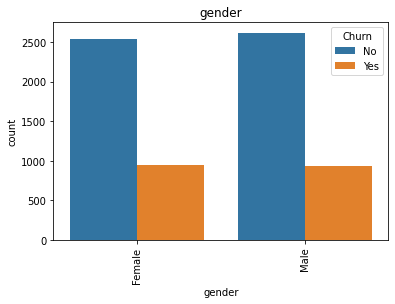

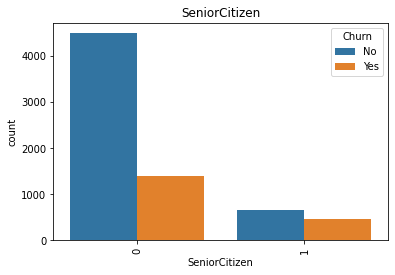

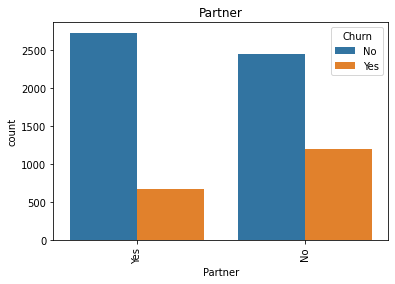

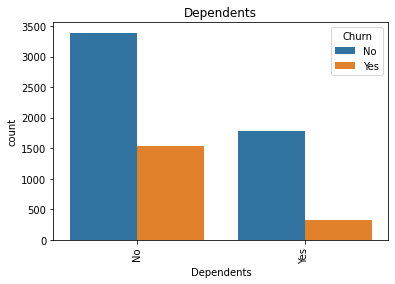

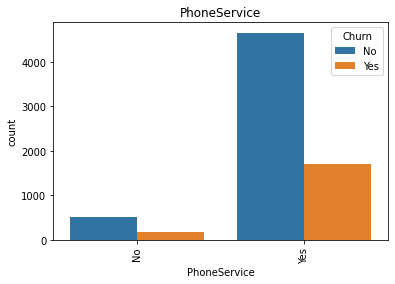

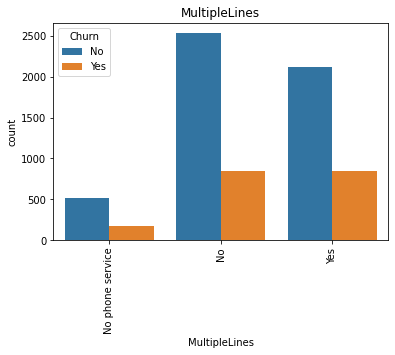

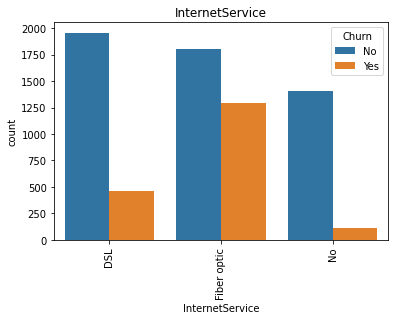

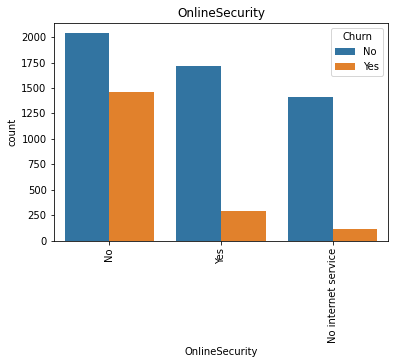

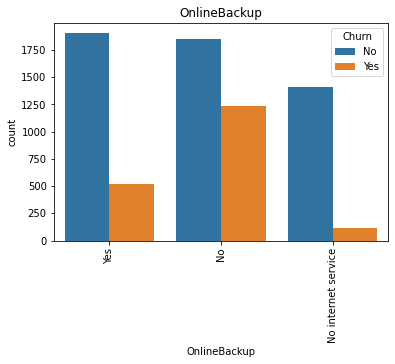

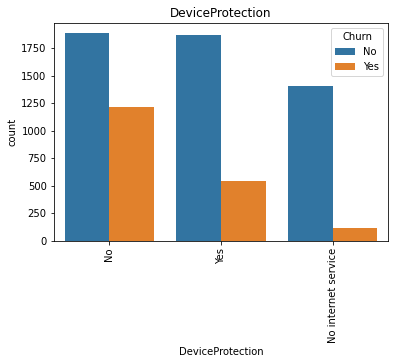

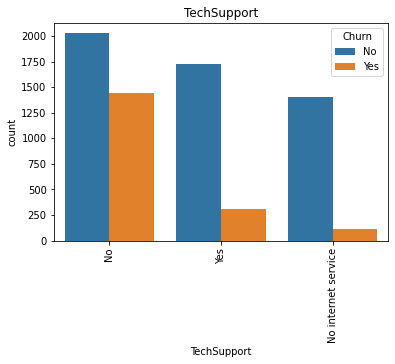

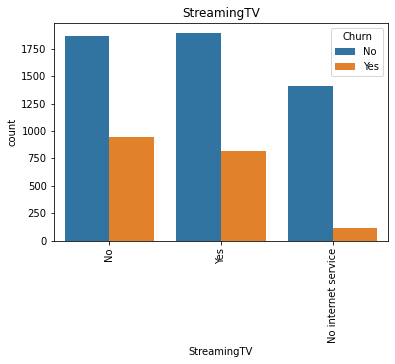

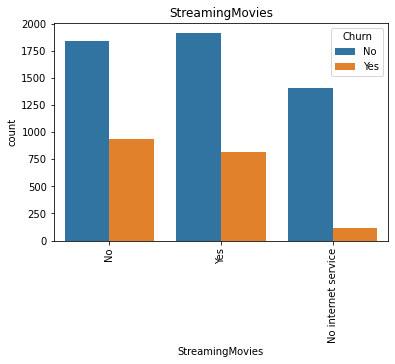

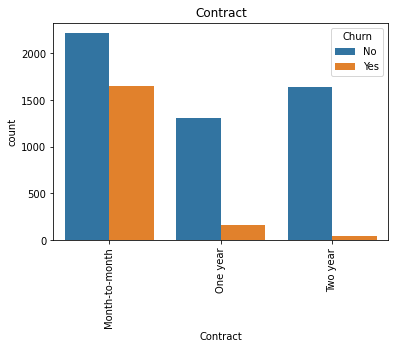

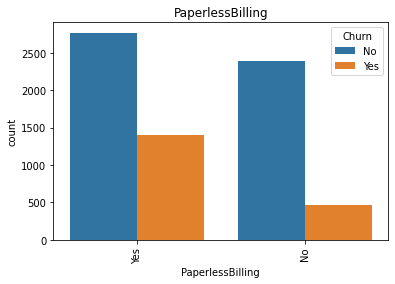

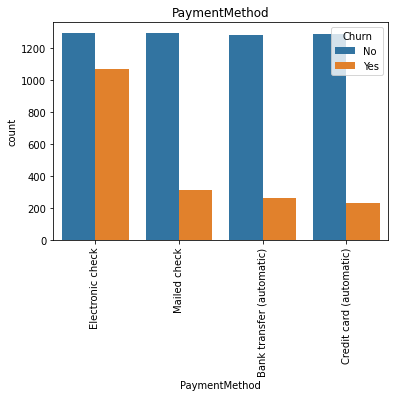

In [11]:
df_column = """ 
    gender SeniorCitizen Partner Dependents  PhoneService
    MultipleLines InternetService OnlineSecurity OnlineBackup 
    DeviceProtection TechSupport StreamingTV StreamingMovies 
    Contract PaperlessBilling PaymentMethod 
"""

plt_drw = df_column.split()
for word in plt_drw:
    sns.countplot(x=word, hue="Churn", data=df)
    plt1 = plt.xticks(rotation=90)
    plt1 = plt.title(word)
    plt.show()
    print("\n")


# Spliting Dataset to Test and Train

Main dataset is splitted to Train and Test at the beggining with ratio of 30/70 before Feature Engineering

In [12]:
training_data, testing_data = sklearn.model_selection.train_test_split(
    df, test_size=0.30, random_state=42
)
print(f"Train Dataset:{training_data.shape[0]:,}")
print(f"Test Dataset: {testing_data.shape[0]:,}")

Train Dataset:4,922
Test Dataset: 2,110


In [13]:
training_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
5154-VEKBL,Female,0,No,No,9,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,58.50,539.85,Yes
9052-DHNKM,Male,0,No,No,26,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Electronic check,61.55,1581.95,No
2988-PLAHS,Female,0,No,No,3,Yes,No,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,69.95,220.45,No
1196-AMORA,Male,0,No,No,7,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,No,Electronic check,73.60,520.00,Yes
6695-FRVEC,Male,0,Yes,Yes,67,Yes,No,DSL,Yes,No,Yes,Yes,No,No,Two year,Yes,Bank transfer (automatic),60.40,3953.70,No


Train and Test dataset information: (Shape, Dimension and Size)

In [14]:
print("Training Dataset:")
print(f"Shape: {training_data.shape}")
print(f"Dimension: {training_data.ndim}")
print(f"Size: {training_data.size}", "\n")
print("Test Dataset:")
print(f"Shape:{testing_data.shape}")
print(f"Dimension:{testing_data.ndim}")
print(f"Size:{testing_data.size}")

Training Dataset:
Shape: (4922, 20)
Dimension: 2
Size: 98440 

Test Dataset:
Shape:(2110, 20)
Dimension:2
Size:42200


Feature "Churn" is our target label which is dropped as part of train test split.

# Feature Engineering

To Use ML algorithms all features must be converted to numeric, therefore we explore the data to investigate non-numeric features and convert them to numerical values based on existing methods.

Presentation of Numerical Columns

In [15]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Presentation of Object Columns

In [16]:
df.describe(include=["object"])

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365,5163


The codes below indicate the unique count and values for each object feature.

In [17]:
for i in df.select_dtypes(include="object"):
    print("Column", i, ":")
    print("Unique Values:", df[i].unique())
    print("Count of Unique values:", df[i].nunique(), "\n")

Column gender :
Unique Values: ['Female' 'Male']
Count of Unique values: 2 

Column Partner :
Unique Values: ['Yes' 'No']
Count of Unique values: 2 

Column Dependents :
Unique Values: ['No' 'Yes']
Count of Unique values: 2 

Column PhoneService :
Unique Values: ['No' 'Yes']
Count of Unique values: 2 

Column MultipleLines :
Unique Values: ['No phone service' 'No' 'Yes']
Count of Unique values: 3 

Column InternetService :
Unique Values: ['DSL' 'Fiber optic' 'No']
Count of Unique values: 3 

Column OnlineSecurity :
Unique Values: ['No' 'Yes' 'No internet service']
Count of Unique values: 3 

Column OnlineBackup :
Unique Values: ['Yes' 'No' 'No internet service']
Count of Unique values: 3 

Column DeviceProtection :
Unique Values: ['No' 'Yes' 'No internet service']
Count of Unique values: 3 

Column TechSupport :
Unique Values: ['No' 'Yes' 'No internet service']
Count of Unique values: 3 

Column StreamingTV :
Unique Values: ['No' 'Yes' 'No internet service']
Count of Unique values: 3 


# Total Churn Disstirbution

As our target:(Y) is the "Churn" column, therefore we explore a graphical distribution of churned and active customers as below to identify whether our data is balanced or not, in the case of imbalanced data we need to balance and normalize it.

Active Subs:  5,163
Churn Subs:  1,869


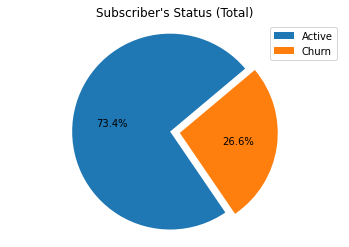

Active Subs:  3,614
Churn Subs:  1,308


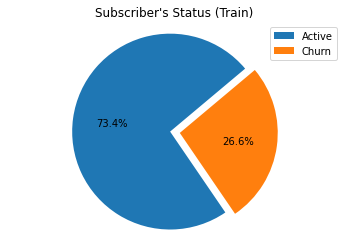

Active Subs:  1,549
Churn Subs:  561


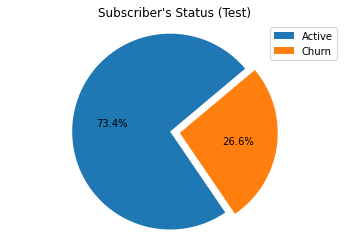

In [18]:
active = df[(df["Churn"] == "No")].count()[1]
churn = df[(df["Churn"] == "Yes")].count()[1]

print("Active Subs: ", f"{active:,}")
print("Churn Subs: ", f"{churn:,}")

sizes = [active, churn]
labels = "Active", "Churn"
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct="%1.1f%%", startangle=40)
ax1.axis("equal")
ax1.set_title("Subscriber's Status (Total)")
ax1.legend(labels)
plt.show()

active = training_data[(training_data["Churn"] == "No")].count()[1]
churn = training_data[(training_data["Churn"] == "Yes")].count()[1]
print("Active Subs: ", f"{active:,}")
print("Churn Subs: ", f"{churn:,}")

sizes = [active, churn]
labels = "Active", "Churn"
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct="%1.1f%%", startangle=40)
ax1.axis("equal")
ax1.set_title("Subscriber's Status (Train)")

ax1.legend(labels)
plt.show()

active = testing_data[(testing_data["Churn"] == "No")].count()[1]
churn = testing_data[(testing_data["Churn"] == "Yes")].count()[1]
print("Active Subs: ", f"{active:,}")
print("Churn Subs: ", f"{churn:,}")

sizes = [active, churn]
labels = "Active", "Churn"
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct="%1.1f%%", startangle=40)
ax1.axis("equal")
ax1.set_title("Subscriber's Status (Test)")

ax1.legend(labels)
plt.show()


# Label Encoding

As "Churn" column is our target column we decided to encode it with labelEncoder to prevent header name changing

In [19]:
lbl_train = LabelEncoder()
training_data["Churn"] = lbl_train.fit_transform(training_data["Churn"])

In [20]:
training_data.head(3)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
5154-VEKBL,Female,0,No,No,9,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,Yes,Month-to-month,No,Mailed check,58.50,539.85,1
9052-DHNKM,Male,0,No,No,26,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Electronic check,61.55,1581.95,0
2988-PLAHS,Female,0,No,No,3,Yes,No,DSL,No,No,Yes,No,Yes,Yes,One year,Yes,Electronic check,69.95,220.45,0


In [21]:
lbl_test = LabelEncoder()
testing_data["Churn"] = lbl_test.fit_transform(testing_data["Churn"])

In [22]:
testing_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
6614-YWYSC,Male,1,Yes,No,61,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Bank transfer (automatic),25.00,1501.75,0
9546-KDTRB,Female,0,No,No,19,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),24.70,465.85,0
0871-URUWO,Male,0,Yes,No,13,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),102.25,1359.00,1
5151-HQRDG,Male,0,Yes,No,37,Yes,Yes,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Mailed check,55.05,2030.75,0
6624-JDRDS,Female,0,No,No,6,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),29.45,161.45,0


# Get Dummies Encoding

For variables with equal or more than 2 categories, we used Get-Dummmies encoding. as we explored in the dataset, there is no priority between values for each feature, therefore, to prevent adding any weight to values we converted them with the Get-Dummies method.

In [23]:
training_data = pd.get_dummies(
    training_data,
    columns=[
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
    ],
)

To observe all features are converted to numerical values.

In [24]:
training_data.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
5154-VEKBL,0,9,58.50,539.85,1,1,0,1,0,1,...,1,1,0,0,1,0,0,0,0,1
9052-DHNKM,0,26,61.55,1581.95,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2988-PLAHS,0,3,69.95,220.45,0,1,0,1,0,1,...,1,0,1,0,0,1,0,0,1,0


As we encoded some features for our Train dataset with the same approach we will do it for the test dataset as well.

In [25]:
testing_data = pd.get_dummies(
    testing_data,
    columns=[
        "gender",
        "Partner",
        "Dependents",
        "PhoneService",
        "MultipleLines",
        "InternetService",
        "OnlineSecurity",
        "OnlineBackup",
        "DeviceProtection",
        "TechSupport",
        "StreamingTV",
        "StreamingMovies",
        "Contract",
        "PaperlessBilling",
        "PaymentMethod",
    ],
)

To observe all features are converted to numerical values.

In [26]:
testing_data.head(3)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,
6614-YWYSC,1,61,25.00,1501.75,0,0,1,0,1,1,...,0,0,0,1,1,0,1,0,0,0
9546-KDTRB,0,19,24.70,465.85,0,1,0,1,0,1,...,0,1,0,0,1,0,1,0,0,0
0871-URUWO,0,13,102.25,1359.00,1,0,1,0,1,1,...,1,1,0,0,0,1,0,1,0,0


Split Training Data to test and train.

we did this approach to prevent any data leakage between our main test and train dataset.

In [27]:
x1 = training_data.drop("Churn", axis=1)
y1 = training_data["Churn"]

x1_train, x1_test, y1_train, y1_test = train_test_split(
    x1, y1, test_size=0.30, random_state=42
)
print("X_train", len(x1_train))
print("X_test", len(x1_test))
print("y_train", len(y1_train))
print("y_test", len(y1_test))

X_train 3445
X_test 1477
y_train 3445
y_test 1477


In [28]:
x2 = testing_data.drop("Churn", axis=1)
y2 = testing_data["Churn"]

x2_train, x2_test, y2_train, y2_test = train_test_split(
    x2, y2, test_size=0.30, random_state=42
)
print("X_train", len(x2_train))
print("X_test", len(x2_test))
print("y_train", len(y2_train))
print("y_test", len(y2_test))

X_train 1477
X_test 633
y_train 1477
y_test 633


# Feature Engineering (Over Sampling)

As we explored our dataset previously, our target label which is "Churn" is imbalanced, therefore we need to balance our dataset.

For this purpose, we used SMOTE technic to generate some synthetic samples for the minority class.

In [29]:
sm1 = imblearn.over_sampling.SMOTE()
x1_train, y1_train = sm1.fit_resample(x1_train, y1_train)

In [30]:
sm2 = imblearn.over_sampling.SMOTE()
x2_train, y2_train = sm2.fit_resample(x2_train, y2_train)

# Feature Engineering (Standardization)

As our features have different scales like gender and other categories most are boolean, but tenure is counting months, on the other hand, we have prices like Total Charges and Monthly charges which are money but there is no preferably among them and all features weight is same. therefore we use the standardization model to rescale our feature to prevent bias in our prediction.

We do standardization once for our training dataset and once for the test dataset.

x1_train and x1_test belong to the Training Dataset.

In [31]:
scaler1 = sklearn.preprocessing.StandardScaler(with_mean=False)
scaler1.fit(x1_train)
x1_train = scaler1.transform(x1_train)
x1_test = scaler1.transform(x1_test)

print("x1_train Size", x1_train.shape)
print("x1_test size", x1_test.shape)

x1_train Size (5048, 45)
x1_test size (1477, 45)


Standardization for the test dataset.

x2_train and x2_test belong to the Testing Dataset.

In [32]:
scaler2 = sklearn.preprocessing.StandardScaler(with_mean=False)
scaler2.fit(x2_train)
x2_train = scaler2.transform(x2_train)
x2_test = scaler2.transform(x2_test)

print("x_train size", x2_train.shape)
print("x_test size", x2_test.shape)

x_train size (2166, 45)
x_test size (633, 45)


# Model Assessment

# Model Selection and Hyperparameter Tunning

In the following steps, we will tune some Hyperparameters which were important according to Scikit-learn documentation.

below Classification algorithms are selected and tuned:
1. Decision Tree
2. Support vector machines (SVMs)
3. Gaussian Naive Bayes
4. K-Nearest Neighbour (KNN)
5. Logistic Regression

# 1. Decision Tree

In [33]:
parameters_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": range(1, 50, 2),
    "min_samples_split": range(2, 40, 2),
}
model_dt = sklearn.model_selection.GridSearchCV(
    sklearn.tree.DecisionTreeClassifier(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model_dt.fit(x1_train, y1_train)
print("Accuracy of best Decision Tree classfier = {:.2f}".format(model_dt.best_score_))
print(
    "Best found Hyperparameters of Decision Tree classifier ={}".format(
        model_dt.best_params_
    )
)

Fitting 5 folds for each of 950 candidates, totalling 4750 fits
Accuracy of best Decision Tree classfier = 0.83
Best found Hyperparameters of Decision Tree classifier ={'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 26}


# 2. SVM

In [34]:
parameters_grid = {
    "kernel": ["rbf", "poly", "sigmoid"],
    "C": [ 0.01, 0.1, 1, 10,100,200,300]
}
model_svm = sklearn.model_selection.GridSearchCV(
    sklearn.svm.SVC(), parameters_grid, scoring="accuracy", cv=5, verbose=2, n_jobs=-1
)
model_svm.fit(x1_train, y1_train)
print("Accuracy of best SVM classfier = {:.2f}".format(model_svm.best_score_))
print("Best found Hyperparameters of SVM classifier ={}".format(model_svm.best_params_))


Fitting 5 folds for each of 21 candidates, totalling 105 fits
Accuracy of best SVM classfier = 0.83
Best found Hyperparameters of SVM classifier ={'C': 1, 'kernel': 'rbf'}


# 3. Gaussian Naive Bayes

In [35]:
parameters_grid = {"var_smoothing": np.logspace(0, -9, num=100)}

model_naiveb = sklearn.model_selection.GridSearchCV(
    sklearn.naive_bayes.GaussianNB(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model_naiveb.fit(x1_train, y1_train)
print(
    "Accuracy of best Naive Bayes classfier = {:.2f}".format(model_naiveb.best_score_)
)
print(
    "Best found Hyperparameters of Naive Bayes classifier ={}".format(
        model_naiveb.best_params_
    )
)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Accuracy of best Naive Bayes classfier = 0.79
Best found Hyperparameters of Naive Bayes classifier ={'var_smoothing': 0.02310129700083159}


# 4. KNN

In [36]:
parameters_grid = {
    "leaf_size": range(1, 10),
    "n_neighbors": range(1, 40),
    "p": [1, 2],
    "weights": ["uniform", "distance"],
    "metric": ["euclidean", "manhattan", "minkowski"],
}

model_knn = sklearn.model_selection.GridSearchCV(
    sklearn.neighbors.KNeighborsClassifier(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model_knn.fit(x1_train, y1_train)
print("Accuracy of best KNN classfier = {:.2f}".format(model_knn.best_score_))
print("Best found Hyperparameters of KNN classifier ={}".format(model_knn.best_params_))

Fitting 5 folds for each of 4212 candidates, totalling 21060 fits
Accuracy of best KNN classfier = 0.83
Best found Hyperparameters of KNN classifier ={'leaf_size': 1, 'metric': 'manhattan', 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}


# 5. Logistic Regression

In [37]:
parameters_grid = {
    "solver": ["newton-cg", "lbfgs", "liblinear", "sag", "saga"],
    "penalty": ["l2"],
    "C": [
        1000,
        1100,
        1200,
        1300,
        1400,
        1500,
        1600,
        2000,
    ],
    "tol": np.logspace(0, -9, num=100),
}

model_lr = sklearn.model_selection.GridSearchCV(
    sklearn.linear_model.LogisticRegression(),
    parameters_grid,
    scoring="accuracy",
    cv=5,
    verbose=2,
    n_jobs=-1,
)
model_lr.fit(x1_train, y1_train)
print(
    "Accuracy of best Logistic Regression classfier = {:.2f}".format(
        model_lr.best_score_
    )
)
print(
    "Best found Hyperparameters of Logistic Regression classifier ={}".format(
        model_lr.best_params_
    )
)

Fitting 5 folds for each of 4000 candidates, totalling 20000 fits
Accuracy of best Logistic Regression classfier = 0.86
Best found Hyperparameters of Logistic Regression classifier ={'C': 1100, 'penalty': 'l2', 'solver': 'sag', 'tol': 0.1}


# Training and Testing Models

# 1. Decision Tree

we will set all hyperparameters which are found in the above GridSearch Algorithm in the following models to train our model; then accordingly predict our test dataset. 
in our prediction we will represent four measures as below:
* "Accuracy"
* "Precision"
* "Recall"
* "F1"

In [44]:
model_dt = sklearn.tree.DecisionTreeClassifier(
    criterion="gini", max_depth=9, min_samples_split=26
)
model_dt.fit(x1_test, y1_test)

DecisionTreeClassifier(max_depth=9, min_samples_split=26)

In [45]:
y_predicted = model_dt.predict(x2_test)
accuracy_dt = sklearn.metrics.accuracy_score(y2_test, y_predicted)
accuracy_dt = round(accuracy_dt * 100, 2)
precision_dt = round(sklearn.metrics.precision_score(y2_test, y_predicted) * 100, 2)
recall_dt = round(sklearn.metrics.recall_score(y2_test, y_predicted) * 100, 2)
f1_dt = round(sklearn.metrics.f1_score(y2_test, y_predicted) * 100, 2)
# cm = sklearn.metrics.confusion_matrix(y2_test, y_predicted)

header = ["Accuracy", "Precision", "Recall", "F1"]
data_dt = np.array([accuracy_dt, precision_dt, recall_dt, f1_dt])
pd.DataFrame(data_dt, header)
# print(cm)

,0
Accuracy,77.25
Precision,57.42
Recall,53.29
F1,55.28


Graphical view of Decision Tree

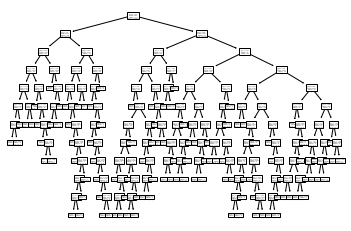

In [46]:
tree.plot_tree(model_dt);

# 2. SVM

In [48]:
model_svm = sklearn.svm.SVC(C=1, kernel="rbf")
model_svm.fit(x1_test, y1_test)

SVC(C=1)

In [50]:
y_predicted = model_svm.predict(x2_test)
accuracy_svm = sklearn.metrics.accuracy_score(y2_test, y_predicted)
accuracy_svm = round(accuracy_svm * 100, 2)
precision_svm = round(sklearn.metrics.precision_score(y2_test, y_predicted) * 100, 2)
recall_svm = round(sklearn.metrics.recall_score(y2_test, y_predicted) * 100, 2)
f1_svm = round(sklearn.metrics.f1_score(y2_test, y_predicted) * 100, 2)
# cm = sklearn.metrics.confusion_matrix(y2_test, y_predicted)
header = ["Accuracy", "Precision", "Recall", "F1"]
data_svm = np.array([accuracy_svm, precision_svm, recall_svm, f1_svm])
pd.DataFrame(data_svm, header)
# print(cm)

,0
Accuracy,79.78
Precision,64.44
Recall,52.10
F1,57.62


# 3. Gaussian Naive Bayes

In [53]:
model_nb = sklearn.naive_bayes.GaussianNB(var_smoothing=0.02310129700083159)
model_nb.fit(x1_test, y1_test)

GaussianNB(var_smoothing=0.02310129700083159)

In [54]:
y_predicted = model_nb.predict(x2_test)
accuracy_gnb = sklearn.metrics.accuracy_score(y2_test, y_predicted)
accuracy_gnb = round(accuracy_gnb * 100, 2)
precision_gnb = round(sklearn.metrics.precision_score(y2_test, y_predicted) * 100, 2)
recall_gnb = round(sklearn.metrics.recall_score(y2_test, y_predicted) * 100, 2)
f1_gnb = round(sklearn.metrics.f1_score(y2_test, y_predicted) * 100, 2)

header = ["Accuracy", "Precision", "Recall", "F1"]
data_gnb = np.array([accuracy_gnb, precision_gnb, recall_gnb, f1_gnb])
pd.DataFrame(data_gnb, header)

,0
Accuracy,68.72
Precision,45.14
Recall,86.23
F1,59.26


# 4. KNN

In [59]:
model_knn = sklearn.neighbors.KNeighborsClassifier(
    leaf_size=1, n_neighbors=10, metric="manhattan", p=1, weights="uniform"
)
model_knn.fit(x1_test, y1_test)

KNeighborsClassifier(leaf_size=1, metric='manhattan', n_neighbors=10, p=1)

In [60]:
y_predicted = model_knn.predict(x2_test)
accuracy_knn = sklearn.metrics.accuracy_score(y2_test, y_predicted)
accuracy_knn = round(accuracy_knn * 100, 2)
precision_knn = round(sklearn.metrics.precision_score(y2_test, y_predicted) * 100, 2)
recall_knn = round(sklearn.metrics.recall_score(y2_test, y_predicted) * 100, 2)
f1_knn = round(sklearn.metrics.f1_score(y2_test, y_predicted) * 100, 2)

header = ["Accuracy", "Precision", "Recall", "F1"]
data_knn = np.array([accuracy_knn, precision_knn, recall_knn, f1_knn])
pd.DataFrame(data_knn, header)

,0
Accuracy,78.52
Precision,60.26
Recall,54.49
F1,57.23


# 5. Logistic Regression

In [63]:
model_lr = sklearn.linear_model.LogisticRegression(
    C=1100, penalty="l2", solver="sag", tol= 0.1
)
model_lr.fit(x1_test, y1_test)

LogisticRegression(C=1100, solver='sag', tol=0.1)

In [64]:
y_predicted = model_lr.predict(x2_test)
accuracy_lr = sklearn.metrics.accuracy_score(y2_test, y_predicted)
accuracy_lr = round(accuracy_lr * 100, 2)
precision_lr = round(sklearn.metrics.precision_score(y2_test, y_predicted) * 100, 2)
recall_lr = round(sklearn.metrics.recall_score(y2_test, y_predicted) * 100, 2)
f1_lr = round(sklearn.metrics.f1_score(y2_test, y_predicted) * 100, 2)

header = ["Accuracy", "Precision", "Recall", "F1"]
data_lr = np.array([accuracy_lr, precision_lr, recall_lr, f1_lr])
pd.DataFrame(data_lr, header)

,0
Accuracy,80.57
Precision,67.19
Recall,51.50
F1,58.31


# Model Selection

All the above results are integrated into the below table to have a better view and conclusion.

In [66]:
result = BeautifulTable()
result.set_style(BeautifulTable.STYLE_RST)
result.column_headers = ["Model", "Accuracy", "Precision", "Recall", "F1"]
result.append_row(["Decision Tree", accuracy_dt, precision_dt, recall_dt, f1_dt])
result.append_row(["SVM", accuracy_svm, precision_svm, recall_svm, f1_svm])
result.append_row(["Gaussian NB", accuracy_gnb, precision_gnb, recall_gnb, f1_gnb])
result.append_row(["KNN",  accuracy_knn, precision_knn, recall_knn, f1_knn])
result.append_row(
    [
        colored("Logistic Regression", "blue"),
        accuracy_lr,
        precision_lr,
        recall_lr,
        f1_lr,
    ]
)
result.rows.sort("Accuracy", reverse=True)
print(result)

===================== ========== =========== ======== =======
        Model          Accuracy   Precision   Recall    F1   
===================== ========== =========== ======== =======
 Logistic Regression    80.57       67.19      51.5    58.31 
         SVM            79.78       64.44      52.1    57.62 
         KNN            78.52       60.26     54.49    57.23 
    Decision Tree       77.25       57.42     53.29    55.28 
     Gaussian NB        68.72       45.14     86.23    59.26 
===================== ========== =========== ======== =======


As it is observed, the Logistic Regression method has better "Accuracy" and "Precision" in comparison with other models.

Also worth mentioning all test scores are lower than train score which mean we probably didn't have data leakage and overfitting issues.

# Analysis, Suggestion

In the end, according to some approaches from expert ML specialists: "The metrics alone aren’t enough to determine if our model is usable in real-life scenarios. (The definitive guide to Accuracy, Precision, and Recall for product developers, 2022)
we must establish a baseline score and compare our model’s performance against that baseline score." In the future, we’ll try to focus on this metric to assess how much these findings are practical with real data and similar datasets.

Since our model doesn't concentrate on fraudulent activity, higher precision might be not our main area of interest. However, we utilized the other measures, like "Recall" and "F1," to see how our model was behaving.

According to what was learned via practice, the "SVM" method is not very effective for comparable data since it takes too long and costs too much to calculate. However, "KNN" is an additional option after "Logistic Regression," which is quicker than "SVM."

Other classification methods, including "Random Forest Classification" and "Kernel SVM," that may be used in practice are those that have been explored.

As mentioned, testing certain ML algorithms for Classification is just getting started, and more tuning will be required to attain better outcomes.

# Reference:


* Kaggle.com. 2022. Telco Customer Churn. [online] Available at: <https://www.kaggle.com/datasets/blastchar/telco-customer-churn?select=WA_Fn-UseC_-Telco-Customer-Churn.csv> [Accessed 19 August 2022].

* Community.ibm.com. 2022. Telco customer churn (11.1.3+). [online] Available at: <https://community.ibm.com/community/user/businessanalytics/blogs/steven-macko/2019/07/11/telco-customer-churn-1113> [Accessed 19 August 2022].

* DEV Community 👩‍💻👨‍💻. 2022. The definitive guide to Accuracy, Precision, and Recall for product developers. [online] Available at: <https://dev.to/mage_ai/the-definitive-guide-to-accuracy-precision-and-recall-for-product-developers-4ahg> [Accessed 20 September 2022].